In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv('CSV_for_EDA.csv')
df1 = pd.read_csv('exam_score_prediction_data.csv')
df2 = pd.read_csv('flight_arrivals.csv')
df3 = pd.read_csv('marketing_campaign.csv', delimiter=';')
df4 = pd.read_csv('sales_data.csv')
df5 = pd.read_csv('stock_prices.csv')

In [5]:
df.head()

,date,inside_sales,outside_sales,inside_covers,outside_covers,reserved_covers,walkin_covers,waitlist_covers,no_show_covers,no_show_parties,apparent_temperature,humidity,precip_intensity_max,precip_max_time,precip_prob,precip_type,pressure,summary,temperature
0,2017-01-02,13159.84,NaN,174,0,106,26,42,17,6,35.58,0.92,0.0242,15:00:00,0.79,rain,1027.98,rain,39.06
1,2017-01-03,12442.11,NaN,181,0,119,31,31,14,4,41.50,0.94,0.0913,17:00:00,0.77,rain,1000.08,rain,43.19
2,2017-01-04,12927.64,NaN,174,0,131,17,26,5,2,36.81,0.40,0.0176,00:00:00,0.00,rain,1002.55,clear-night,42.29
3,2017-01-05,14457.79,NaN,191,0,138,25,28,4,2,27.11,0.48,0.0000,05:01:00,0.00,none,1014.61,cloudy,31.36
4,2017-01-06,15331.97,NaN,200,0,130,16,54,6,3,24.74,0.48,0.0019,12:00:00,0.00,snow,1022.80,partly-cloudy-night,29.42


In [6]:
df1.head()

,StudyTime,Attendance,PreviousScore,ExamScore
0,2.529313,0,3,NaN
1,6.981098,1,86,41.252067
2,7.225698,1,99,46.090664
3,1.915848,0,90,29.868602
4,5.448594,1,17,NaN


In [7]:
df2.head()

,FlightNumber,ArrivalTime
0,FL0001,2022-01-01 00:00:00.000000000
1,FL0002,2022-01-01 08:44:41.081081081
2,FL0003,2022-01-01 17:29:22.162162162
3,FL0004,2022-01-02 02:14:03.243243243
4,FL0005,2022-01-02 10:58:44.324324324


In [8]:
df3.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [9]:
df4.head()

,Date,Sales
0,2019-01-01,4174
1,2019-01-02,4507
2,2019-01-03,1860
3,2019-01-04,2294
4,2019-01-05,2130


In [10]:
df5.head()

,Date,Close
0,2019-01-01,109.934283
1,2019-01-02,97.234714
2,2019-01-03,112.953771
3,2019-01-04,130.460597
4,2019-01-05,95.316933


Cleaning EDA dataset

In [14]:
#Lets look for missing values
print("Missing values in EDA dataset:", df.isnull().sum())

Missing values in EDA dataset: date                      0
inside_sales              0
outside_sales           475
inside_covers             0
outside_covers            0
reserved_covers           0
walkin_covers             0
waitlist_covers           0
no_show_covers            0
no_show_parties           0
apparent_temperature      0
humidity                  0
precip_intensity_max      0
precip_max_time           0
precip_prob               0
precip_type               0
pressure                  0
summary                   0
temperature               0
dtype: int64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  898 non-null    object 
 1   inside_sales          898 non-null    float64
 2   outside_sales         423 non-null    float64
 3   inside_covers         898 non-null    int64  
 4   outside_covers        898 non-null    int64  
 5   reserved_covers       898 non-null    int64  
 6   walkin_covers         898 non-null    int64  
 7   waitlist_covers       898 non-null    int64  
 8   no_show_covers        898 non-null    int64  
 9   no_show_parties       898 non-null    int64  
 10  apparent_temperature  898 non-null    float64
 11  humidity              898 non-null    float64
 12  precip_intensity_max  898 non-null    float64
 13  precip_max_time       898 non-null    object 
 14  precip_prob           898 non-null    float64
 15  precip_type           8

Text(0.5, 1.0, 'Outside Sales Outliners')

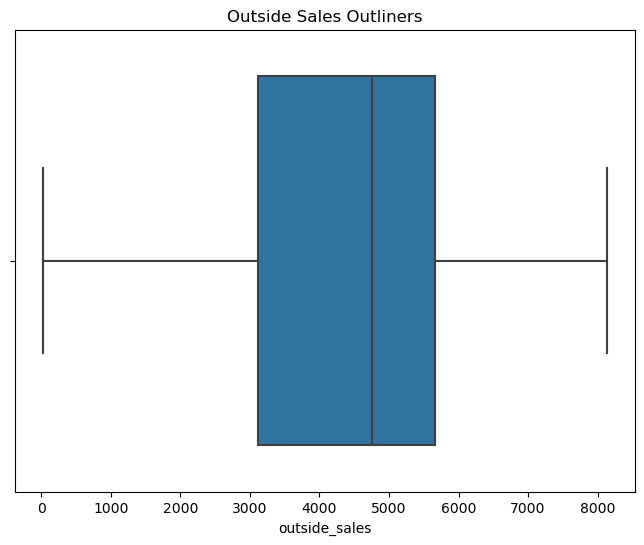

In [20]:
#Okay, so we found out that outsider_sales is the only column with missing value
# outside_sales has 475 null values and 423 non null, hence we can't drop the column

# Checking for outliners in outside_sales
plt.figure(figsize=(8,6))
sns.boxplot(x=df['outside_sales'])
plt.title("Outside Sales Outliners")

In [21]:
#Filling the missing cells with median
df['outside_sales'].fillna(df['outside_sales'].median(), inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  898 non-null    object 
 1   inside_sales          898 non-null    float64
 2   outside_sales         898 non-null    float64
 3   inside_covers         898 non-null    int64  
 4   outside_covers        898 non-null    int64  
 5   reserved_covers       898 non-null    int64  
 6   walkin_covers         898 non-null    int64  
 7   waitlist_covers       898 non-null    int64  
 8   no_show_covers        898 non-null    int64  
 9   no_show_parties       898 non-null    int64  
 10  apparent_temperature  898 non-null    float64
 11  humidity              898 non-null    float64
 12  precip_intensity_max  898 non-null    float64
 13  precip_max_time       898 non-null    object 
 14  precip_prob           898 non-null    float64
 15  precip_type           8

In [23]:
#Looking for types of columns that we have
# Categorical columns 
cat_col = [col for col in df.columns if df[col].dtype == 'object'] 
print('Categorical columns :',cat_col) 
# Numerical columns 
num_col = [col for col in df.columns if df[col].dtype != 'object'] 
print('Numerical columns :',num_col)

Categorical columns : ['date', 'precip_max_time', 'precip_type', 'summary']
Numerical columns : ['inside_sales', 'outside_sales', 'inside_covers', 'outside_covers', 'reserved_covers', 'walkin_covers', 'waitlist_covers', 'no_show_covers', 'no_show_parties', 'apparent_temperature', 'humidity', 'precip_intensity_max', 'precip_prob', 'pressure', 'temperature']


In [24]:
df.head()

,date,inside_sales,outside_sales,inside_covers,outside_covers,reserved_covers,walkin_covers,waitlist_covers,no_show_covers,no_show_parties,apparent_temperature,humidity,precip_intensity_max,precip_max_time,precip_prob,precip_type,pressure,summary,temperature
0,2017-01-02,13159.84,4756.25,174,0,106,26,42,17,6,35.58,0.92,0.0242,15:00:00,0.79,rain,1027.98,rain,39.06
1,2017-01-03,12442.11,4756.25,181,0,119,31,31,14,4,41.50,0.94,0.0913,17:00:00,0.77,rain,1000.08,rain,43.19
2,2017-01-04,12927.64,4756.25,174,0,131,17,26,5,2,36.81,0.40,0.0176,00:00:00,0.00,rain,1002.55,clear-night,42.29
3,2017-01-05,14457.79,4756.25,191,0,138,25,28,4,2,27.11,0.48,0.0000,05:01:00,0.00,none,1014.61,cloudy,31.36
4,2017-01-06,15331.97,4756.25,200,0,130,16,54,6,3,24.74,0.48,0.0019,12:00:00,0.00,snow,1022.80,partly-cloudy-night,29.42


In [25]:
df['outside_covers'].sum()

30193

In [29]:
df[cat_col].nunique()

date               898
precip_max_time     25
precip_type          4
summary              9
dtype: int64

In [30]:
df.isnull().sum()

date                    0
inside_sales            0
outside_sales           0
inside_covers           0
outside_covers          0
reserved_covers         0
walkin_covers           0
waitlist_covers         0
no_show_covers          0
no_show_parties         0
apparent_temperature    0
humidity                0
precip_intensity_max    0
precip_max_time         0
precip_prob             0
precip_type             0
pressure                0
summary                 0
temperature             0
dtype: int64

In [36]:
df['outside_covers'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 898 entries, 0 to 897
Series name: outside_covers
Non-Null Count  Dtype
--------------  -----
898 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [37]:
num_zeros = df['outside_covers'].value_counts().get(0, 0)

print(f"The column 'outside_covers' has {num_zeros} cells with 0 as value.")


The column 'outside_covers' has 465 cells with 0 as value.


In [38]:
df['outside_covers'].duplicated().sum()

774

In [42]:
cleanedEDA = df.drop('outside_covers', axis = 1)

In [43]:
cleanedEDA.head()

,date,inside_sales,outside_sales,inside_covers,reserved_covers,walkin_covers,waitlist_covers,no_show_covers,no_show_parties,apparent_temperature,humidity,precip_intensity_max,precip_max_time,precip_prob,precip_type,pressure,summary,temperature
0,2017-01-02,13159.84,4756.25,174,106,26,42,17,6,35.58,0.92,0.0242,15:00:00,0.79,rain,1027.98,rain,39.06
1,2017-01-03,12442.11,4756.25,181,119,31,31,14,4,41.50,0.94,0.0913,17:00:00,0.77,rain,1000.08,rain,43.19
2,2017-01-04,12927.64,4756.25,174,131,17,26,5,2,36.81,0.40,0.0176,00:00:00,0.00,rain,1002.55,clear-night,42.29
3,2017-01-05,14457.79,4756.25,191,138,25,28,4,2,27.11,0.48,0.0000,05:01:00,0.00,none,1014.61,cloudy,31.36
4,2017-01-06,15331.97,4756.25,200,130,16,54,6,3,24.74,0.48,0.0019,12:00:00,0.00,snow,1022.80,partly-cloudy-night,29.42


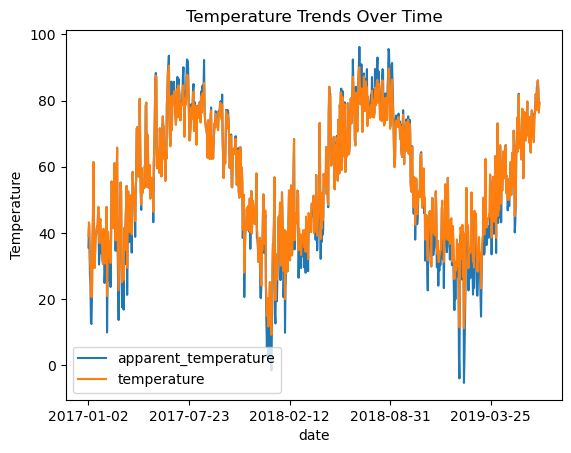

In [44]:
cleanedEDA.set_index('date')[['apparent_temperature', 'temperature']].plot(kind='line')
plt.title('Temperature Trends Over Time')
plt.ylabel('Temperature')
plt.show()

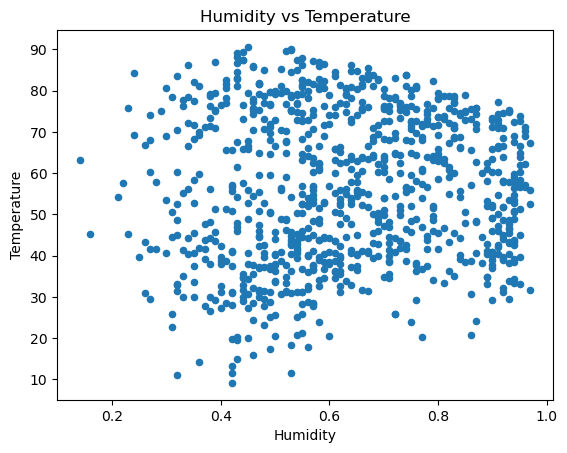

In [45]:
cleanedEDA.plot(kind='scatter', x='humidity', y='temperature')
plt.title('Humidity vs Temperature')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

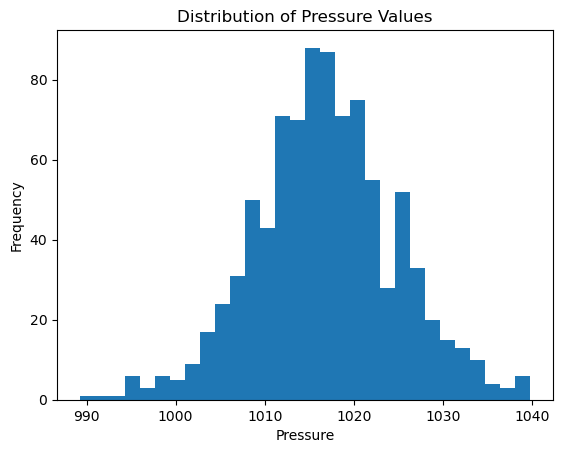

In [46]:
cleanedEDA['pressure'].plot(kind='hist', bins=30)
plt.title('Distribution of Pressure Values')
plt.xlabel('Pressure')
plt.show()

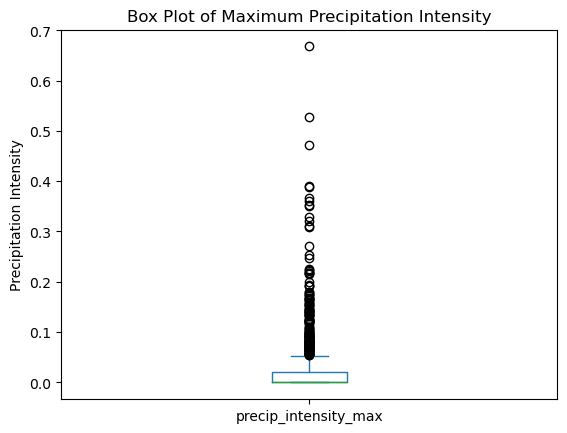

In [47]:
cleanedEDA['precip_intensity_max'].plot(kind='box')
plt.title('Box Plot of Maximum Precipitation Intensity')
plt.ylabel('Precipitation Intensity')
plt.show()

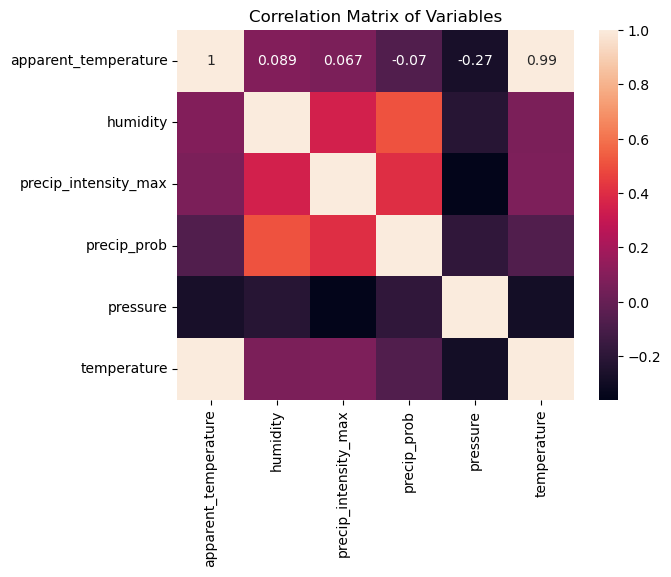

In [48]:
correlation_matrix = cleanedEDA[['apparent_temperature', 'humidity', 'precip_intensity_max', 'precip_prob', 'pressure', 'temperature']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Variables')
plt.show()

Cleaning 'exam_score_prediction_data' dataset

In [49]:
df1.head()

,StudyTime,Attendance,PreviousScore,ExamScore
0,2.529313,0,3,NaN
1,6.981098,1,86,41.252067
2,7.225698,1,99,46.090664
3,1.915848,0,90,29.868602
4,5.448594,1,17,NaN


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27500 entries, 0 to 27499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StudyTime      27500 non-null  float64
 1   Attendance     27500 non-null  int64  
 2   PreviousScore  27500 non-null  int64  
 3   ExamScore      24742 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 859.5 KB


In [51]:
df1.isnull().sum()

StudyTime           0
Attendance          0
PreviousScore       0
ExamScore        2758
dtype: int64

In [52]:
df1['Attendance'].count()

27500

In [53]:
df1.duplicated().sum()

2388

In [54]:
df1.nunique()

StudyTime        25000
Attendance           2
PreviousScore      100
ExamScore        22612
dtype: int64

In [100]:
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27495     True
27496     True
27497     True
27498     True
27499     True
Length: 27500, dtype: bool

In [101]:
df1.tail(10)

,StudyTime,Attendance,PreviousScore,ExamScore
27490,8.936187,1,12,20.365237
27491,4.830453,1,86,48.464711
27492,3.034465,0,88,27.827819
27493,9.145823,1,43,27.904297
27494,3.443507,0,90,22.609818
27495,1.636528,1,73,39.103334
27496,4.797486,0,18,12.876987
27497,6.186415,1,11,26.239815
27498,5.723902,1,99,40.997091
27499,4.829277,0,98,32.286691


In [102]:
# Sort the DataFrame by all columns
df1_sorted = df1.sort_values(by=df1.columns.tolist())

# Then view the bottom rows where duplicates are more likely to be consecutive
print(df1_sorted[df1_sorted.duplicated() | df1_sorted.duplicated(keep=False)].tail(10))

       StudyTime  Attendance  PreviousScore  ExamScore
17833   9.993676           1             36  31.520670
26481   9.993676           1             36  31.520670
19036   9.996883           0             33  22.609818
25063   9.996883           0             33  22.609818
1424    9.997703           1             74  42.358701
25111   9.997703           1             74  42.358701
17257   9.999001           0             36  11.326906
25693   9.999001           0             36  11.326906
22326   9.999349           0             84  29.285148
25766   9.999349           0             84  29.285148


Forgot to drop the duplicated rows in this dataset

In [58]:
np.isinf(df1).sum()

StudyTime        0
Attendance       0
PreviousScore    0
ExamScore        0
dtype: int64

In [59]:
df1.head()

,StudyTime,Attendance,PreviousScore,ExamScore
0,2.529313,0,3,NaN
1,6.981098,1,86,41.252067
2,7.225698,1,99,46.090664
3,1.915848,0,90,29.868602
4,5.448594,1,17,NaN


In [67]:
#Filling the null vlaues with the mean of overall score
df1['ExamScore'].fillna(df1['ExamScore'].mean(), inplace=True)

In [68]:
df1.head()

,StudyTime,Attendance,PreviousScore,ExamScore
0,2.529313,0,3,22.609818
1,6.981098,1,86,41.252067
2,7.225698,1,99,46.090664
3,1.915848,0,90,29.868602
4,5.448594,1,17,22.609818


In [75]:
df1.replace([np.inf, -np.inf], np.nan)

,StudyTime,Attendance,PreviousScore,ExamScore
0,2.529313,0,3,22.609818
1,6.981098,1,86,41.252067
2,7.225698,1,99,46.090664
3,1.915848,0,90,29.868602
4,5.448594,1,17,22.609818
...,...,...,...,...
27495,1.636528,1,73,39.103334
27496,4.797486,0,18,12.876987
27497,6.186415,1,11,26.239815
27498,5.723902,1,99,40.997091


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


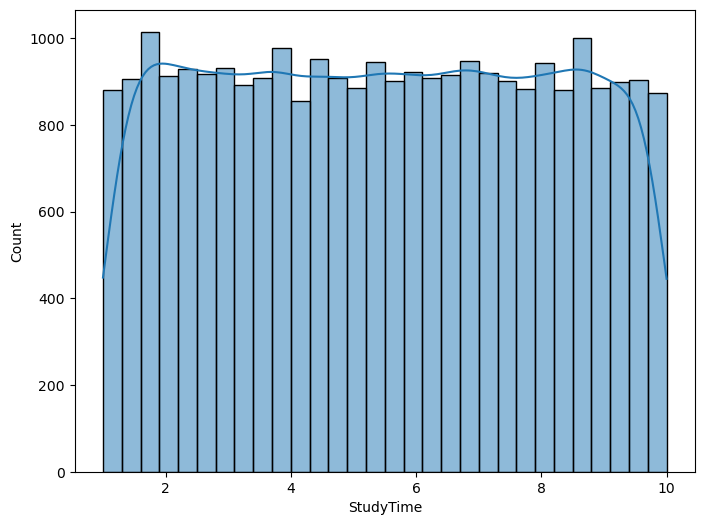

In [84]:
# Histogram of Study Time
plt.figure(figsize=(8,6))
sns.histplot(df1['StudyTime'], bins=30, kde=True)
plt.show()

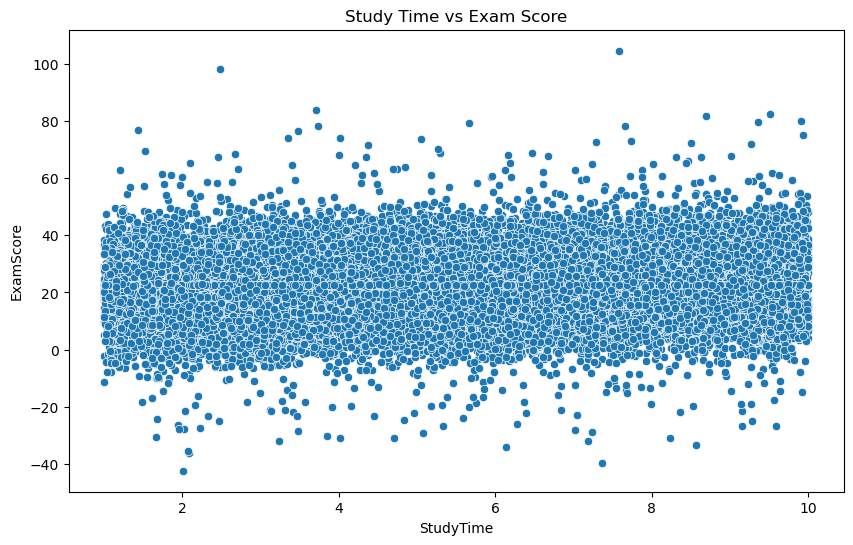

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='StudyTime', y='ExamScore', data=df1)
plt.title('Study Time vs Exam Score')
plt.show()

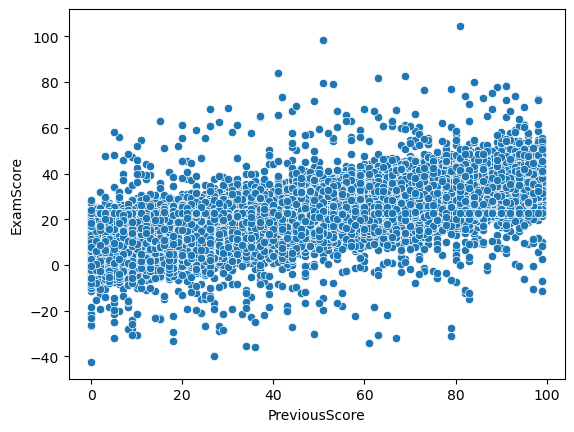

In [87]:
sns.scatterplot(x='PreviousScore', y='ExamScore', data=df1)
plt.show()

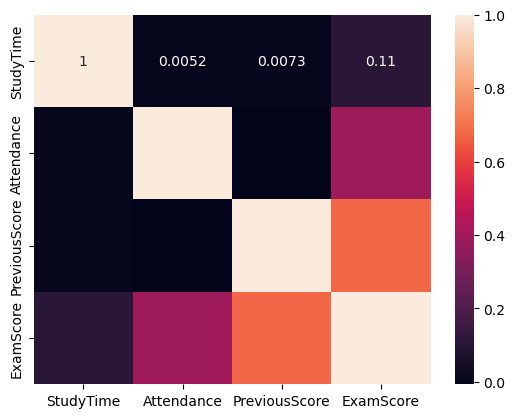

In [89]:
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

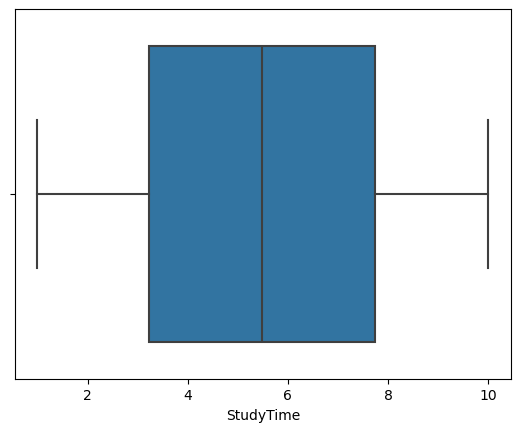

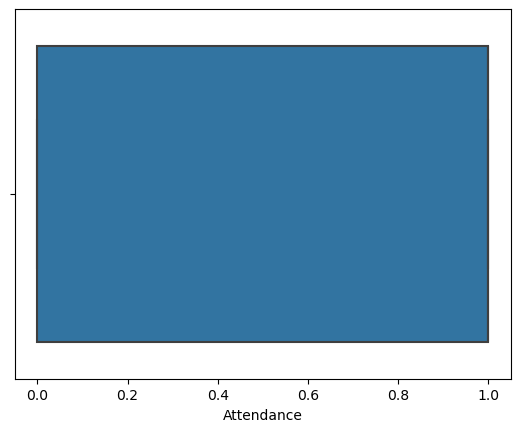

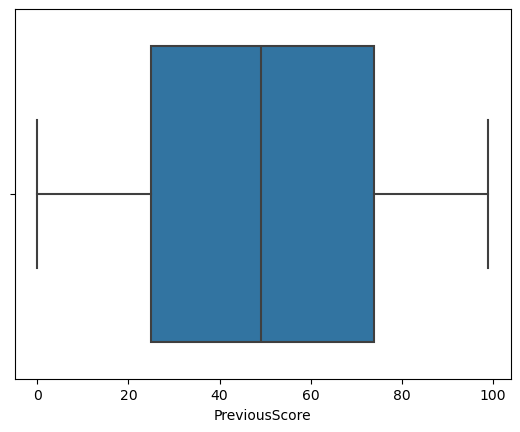

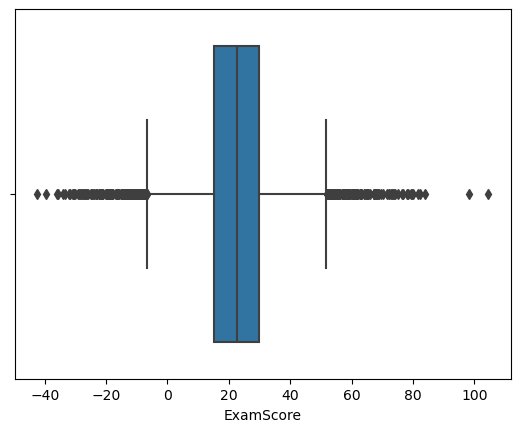

In [90]:
for column in df1.columns:
    sns.boxplot(x=df1[column])
    plt.show()


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

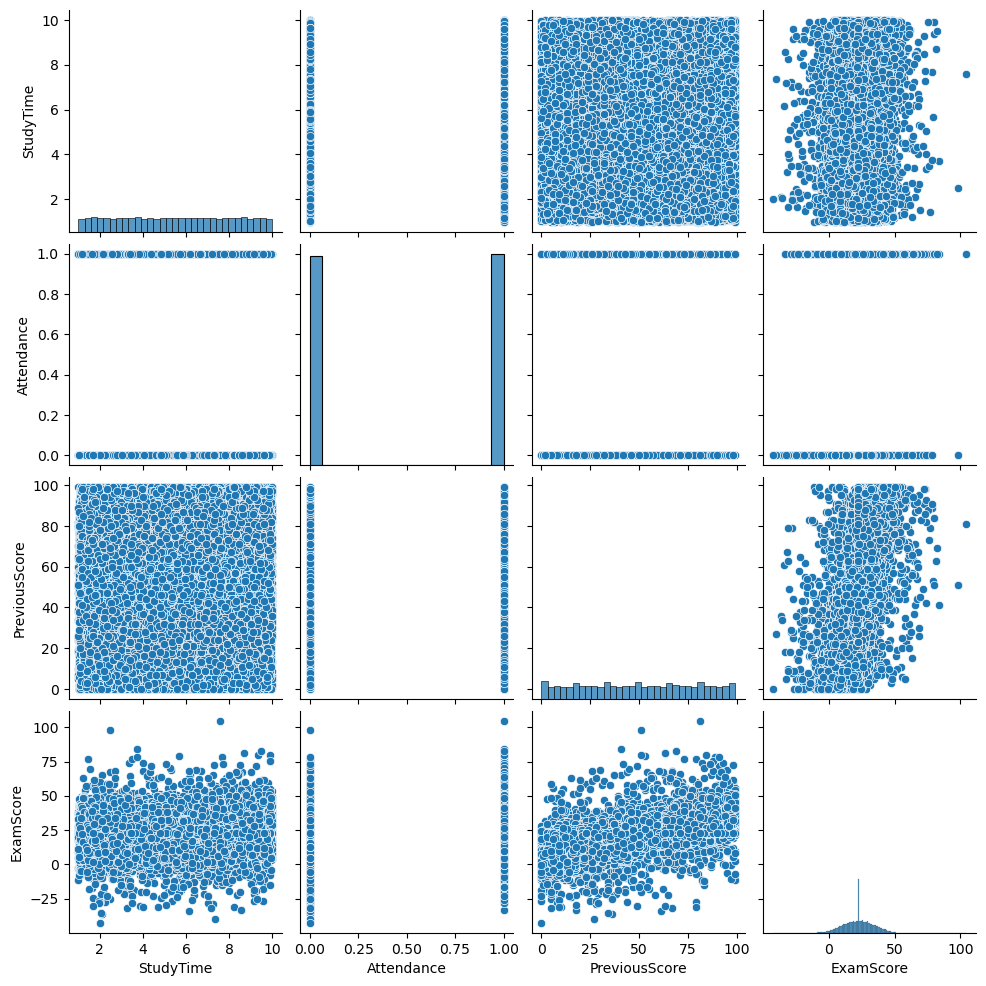

In [91]:
sns.pairplot(df1)
plt.show()

Flight arrival data cleaning and visualization

In [93]:
df2 = pd.read_csv('flight_arrivals.csv')

In [94]:
df2.head()

,FlightNumber,ArrivalTime
0,FL0001,2022-01-01 00:00:00.000000000
1,FL0002,2022-01-01 08:44:41.081081081
2,FL0003,2022-01-01 17:29:22.162162162
3,FL0004,2022-01-02 02:14:03.243243243
4,FL0005,2022-01-02 10:58:44.324324324


In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FlightNumber  1000 non-null   object
 1   ArrivalTime   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [98]:
df2.isnull().sum()

FlightNumber    0
ArrivalTime     0
dtype: int64

In [104]:
df2.duplicated().sum()

0

In [105]:
df2.isnull().sum()

FlightNumber    0
ArrivalTime     0
dtype: int64

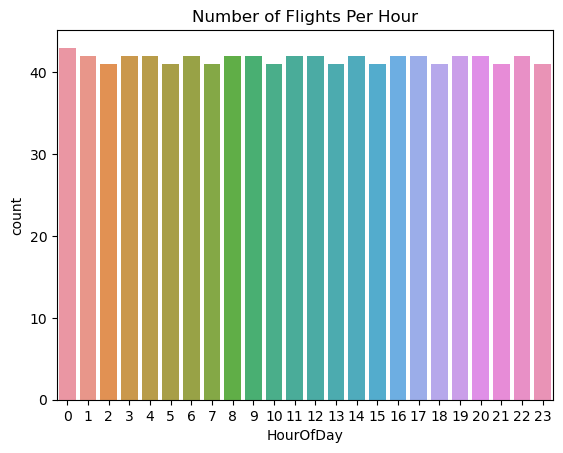

In [114]:
# Convert 'ArrivalTime' to datetime if it's not already
df2['ArrivalTime'] = pd.to_datetime(df2['ArrivalTime'])

# Create a new column for the hour of the day
df2['HourOfDay'] = df2['ArrivalTime'].dt.hour

# Create the count plot
sns.countplot(x='HourOfDay', data=df2)
plt.title('Number of Flights Per Hour')
plt.show()

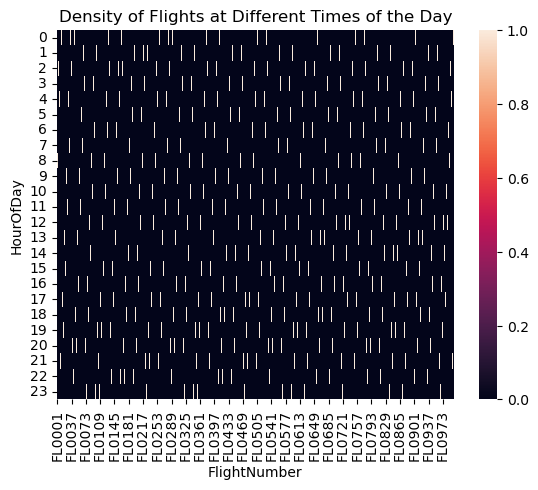

In [117]:
# Create a pivot table
pivot = df2.pivot_table(index='HourOfDay', columns='FlightNumber', aggfunc='size', fill_value=0)

#Creating the hitmap
sns.heatmap(pivot)
plt.title('Density of Flights at Different Times of the Day')
plt.show()
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


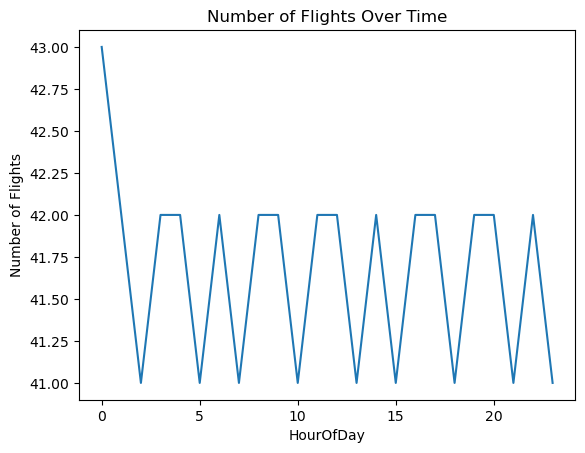

In [118]:
# Group by 'HourOfDay' and count the number of flights
flights_per_hour = df2.groupby('HourOfDay').size()

# Reset the index to make 'HourOfDay' a column again
flights_per_hour = flights_per_hour.reset_index(name='Number of Flights')

# Create the line plot
sns.lineplot(x='HourOfDay', y='Number of Flights', data=flights_per_hour)
plt.title('Number of Flights Over Time')
plt.show()

Marketing campaign data cleaning and visualization

In [130]:
df3 = pd.read_csv('marketing_campaign.csv', delimiter='\t')

In [131]:
df3.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [132]:
df3.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [133]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [134]:
df3['Education'].nunique()

5

In [137]:
median_income = df3['Income'].median()
df3['Income'].fillna(median_income, inplace=True)

In [138]:
df3.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [139]:
df3.duplicated().sum()

0

In [140]:
unique_values = df3['Education'].unique()

print(unique_values)

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [142]:
#Mapping the unique string values of Education to specific integer values
education_levels = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}

df3['Education'] = df3['Education'].map(education_levels)

In [144]:
df3['Education'].head()

0    3
1    3
2    3
3    3
4    5
Name: Education, dtype: int64

In [147]:
columns_to_drop = ['ID', 'Year_Birth', 'Dt_Customer', 'Recency', 'Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
cleanMarketData = df3.drop(columns=columns_to_drop)

In [148]:
cleanMarketData.head()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,3,Single,58138.0,635,88,546,172,88,88,3,8,10,4,7
1,3,Single,46344.0,11,1,6,2,1,6,2,1,1,2,5
2,3,Together,71613.0,426,49,127,111,21,42,1,8,2,10,4
3,3,Together,26646.0,11,4,20,10,3,5,2,2,0,4,6
4,5,Married,58293.0,173,43,118,46,27,15,5,5,3,6,5


In [149]:
df3['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [151]:
cleanMarketData.columns

Index(['Education', 'Marital_Status', 'Income', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

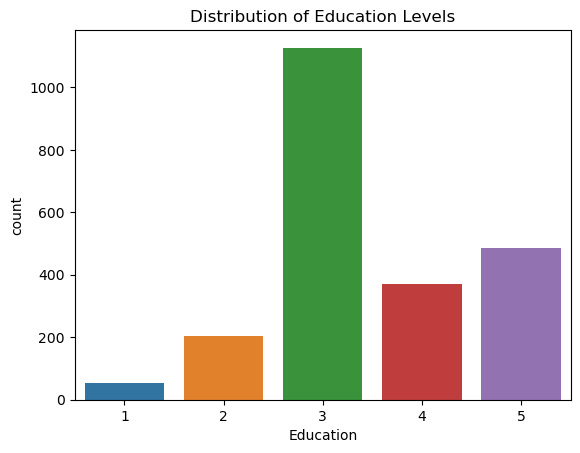

In [152]:
# Count plot for 'Education'
sns.countplot(x='Education', data=cleanMarketData)
plt.title('Distribution of Education Levels')
plt.show()

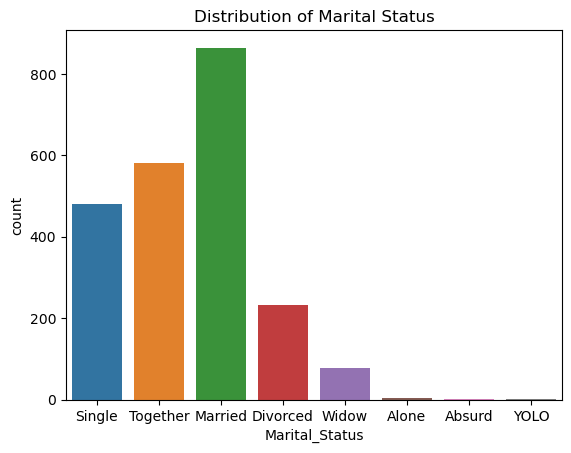

In [153]:
# Count plot for 'Marital_Status'
sns.countplot(x='Marital_Status', data=cleanMarketData)
plt.title('Distribution of Marital Status')
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


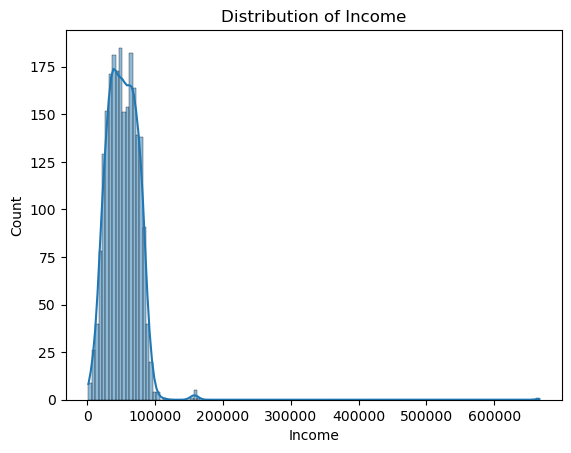

In [154]:
sns.histplot(data=cleanMarketData, x='Income', kde=True)
plt.title('Distribution of Income')
plt.show()

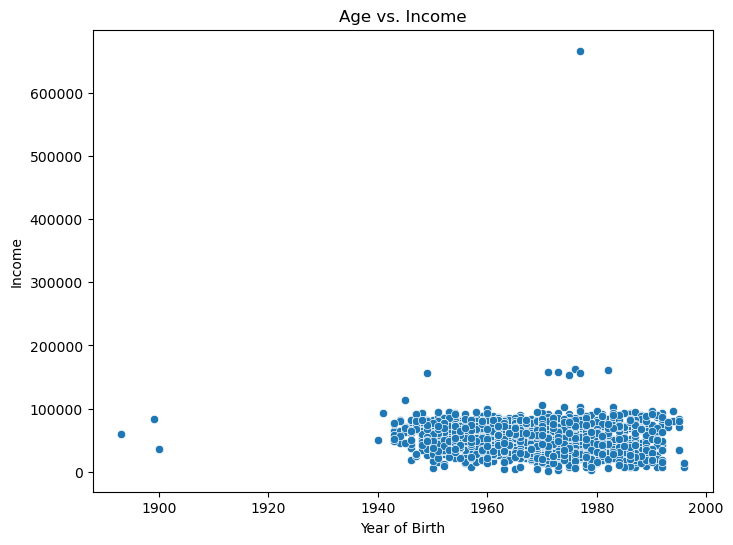

In [158]:
# Scatter plot of Year of birth vs. Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Year_Birth', y='Income', data=df3)
plt.title('Age vs. Income')
plt.xlabel('Year of Birth')
plt.ylabel('Income')
plt.show()

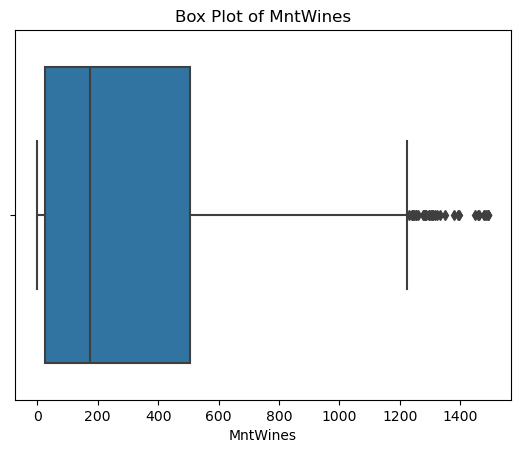

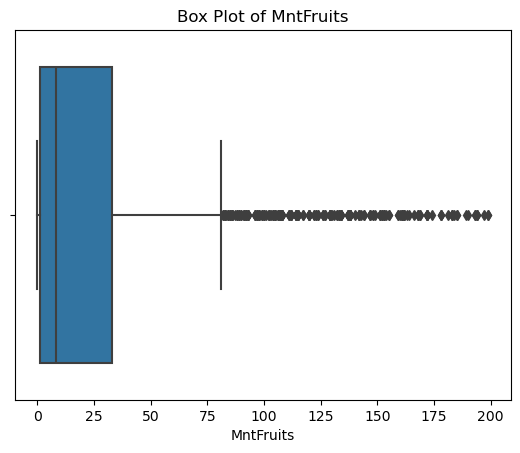

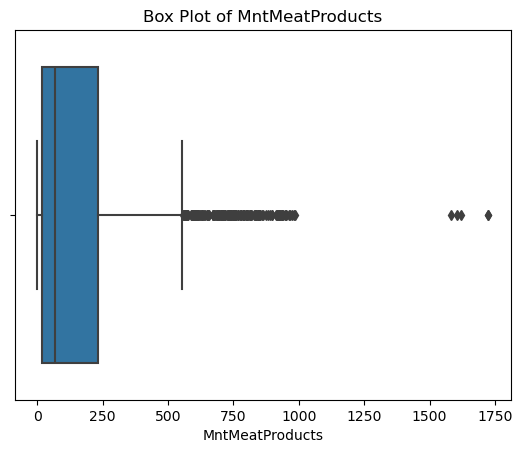

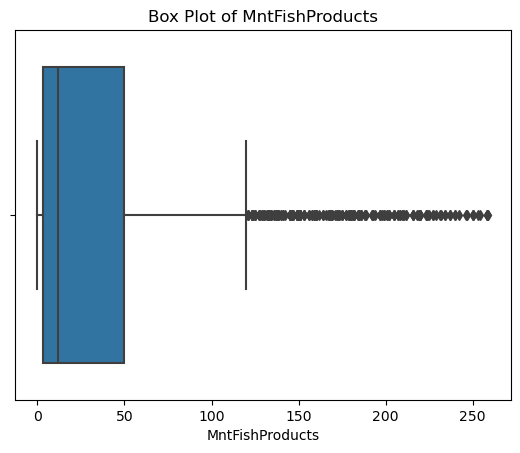

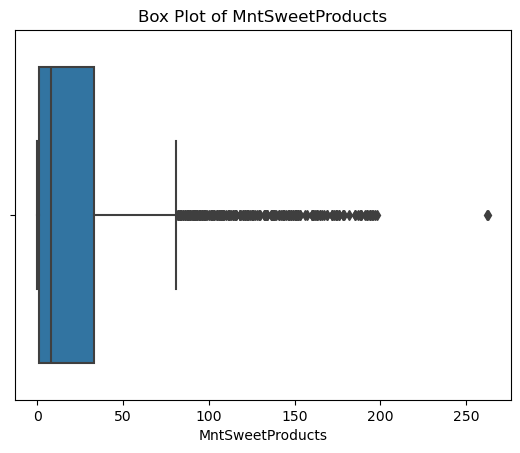

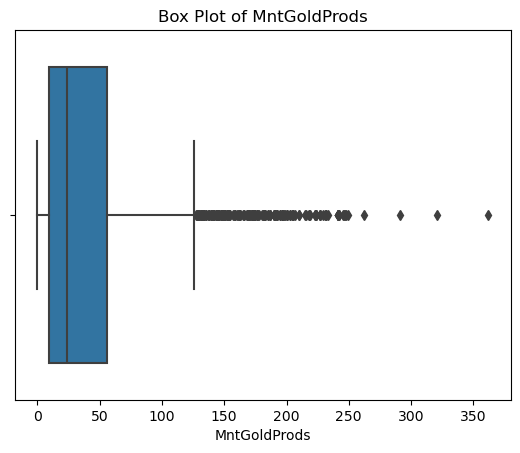

In [155]:
mnt_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for column in mnt_columns:
    sns.boxplot(x=cleanMarketData[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

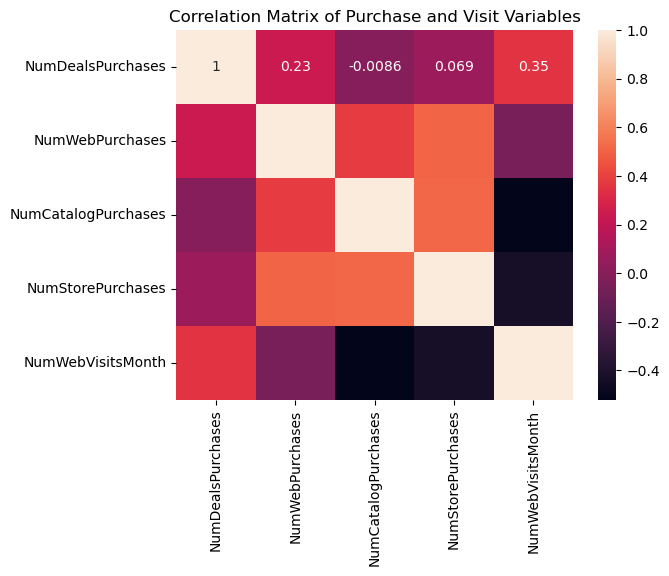

In [156]:
num_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
correlation_matrix = cleanMarketData[num_columns].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Purchase and Visit Variables')
plt.show()

Sales Data Cleaning

In [159]:
df4.head()

,Date,Sales
0,2019-01-01,4174
1,2019-01-02,4507
2,2019-01-03,1860
3,2019-01-04,2294
4,2019-01-05,2130


In [160]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    731 non-null    object
 1   Sales   731 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [161]:
df4.isnull().sum()

Date     0
Sales    0
dtype: int64

In [163]:
df4.duplicated().sum()

0

In [167]:
cleanedSalesData = df4.copy()
cleanedSalesData['Date'] = pd.to_datetime(cleanedSalesData['Date'])

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


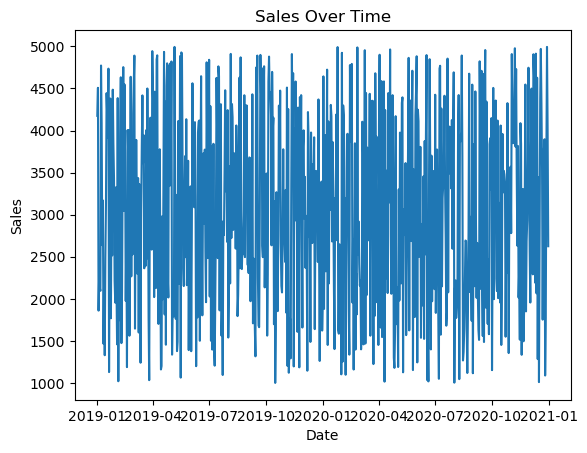

In [169]:
#Visualizing the data
sns.lineplot(x='Date', y='Sales', data=cleanedSalesData)
plt.title('Sales Over Time')
plt.show()

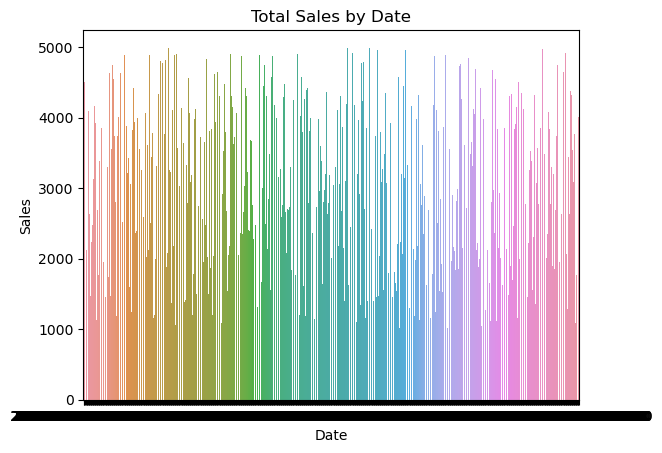

In [170]:
# Group by 'Date' and sum 'Sales'
sales_by_date = cleanedSalesData.groupby('Date')['Sales'].sum().reset_index()

# Create the bar plot
sns.barplot(x='Date', y='Sales', data=sales_by_date)
plt.title('Total Sales by Date')
plt.show()

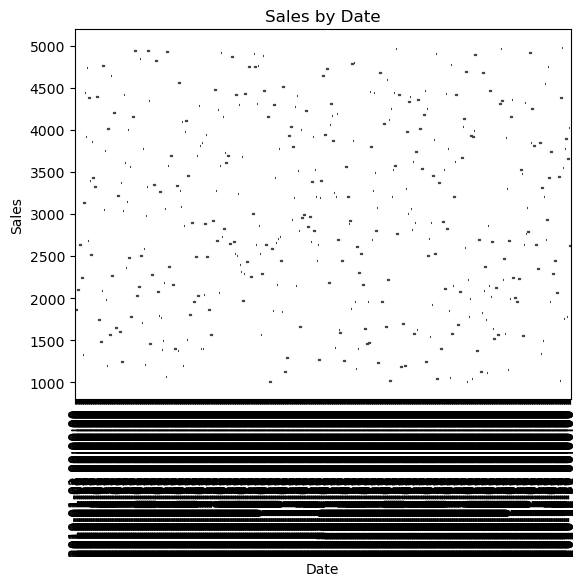

In [171]:
sns.boxplot(x='Date', y='Sales', data=cleanedSalesData)
plt.title('Sales by Date')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

In [172]:
df5.head()

,Date,Close
0,2019-01-01,109.934283
1,2019-01-02,97.234714
2,2019-01-03,112.953771
3,2019-01-04,130.460597
4,2019-01-05,95.316933


In [173]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    731 non-null    object 
 1   Close   731 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.6+ KB


In [175]:
df5.duplicated().sum()

0

In [ ]:
#The dataset is similar in type. No any problems with it. The most we could do is convert the date into date time data type
#and do some visualization which we've done earlier already.